# Load Data & Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error   
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix 


In [2]:
df = pd.read_csv('smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


# Exploration Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


## About data

1. UTC: Time when experiment was performed
2. Temperature[C]: Temperature of surroundings, measured in celcius
3. Humidity[%]: Air humidity during the experiment
4. TVOC[ppb]: Total Volatile Organic Compounds, measured in ppb (parts per billion)
5. eCO2[ppm]: CO2 equivalent concentration, measured in ppm (parts per million)
6. Raw H2: The amount of Raw Hydrogen [Raw Molecular Hydrogen; not compensated (Bias, Temperature etc.)] present in surroundings
7. Raw Ethanol: The amount of Raw Ethanol present in surroundings
8. Pressure[hPa]: Air pressure, Measured in hPa
9. PM1.0: Paticulate matter of diameter less than 1.0 micrometer
10. PM2.5: Paticulate matter of diameter less than 2.5 micrometer
11. NC0.5: Concentration of particulate matter of diameter less than 0.5 micrometer
12. NC1.0: Concentration of particulate matter of diameter less than 1.0 micrometer
13. NC2.5: Concentration of particulate matter of diameter less than 2.5 micrometer
14. CNT: Sample Count. Fire Alarm(Reality) If fire was present then value is 1 else it is 0
15. Fire Alarm: 1 means Positive and 0 means Not Positive

## Drop Unnecessary Columns

In [4]:
df.drop(['Unnamed: 0', 'UTC', 'CNT'], axis = 1, inplace = True)
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [5]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


## Review Features

<Axes: xlabel='Fire Alarm', ylabel='count'>

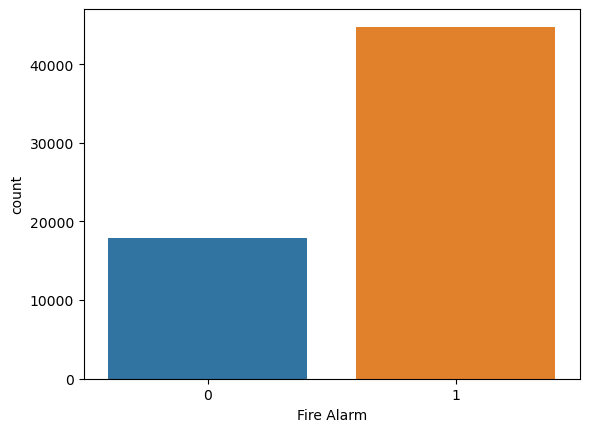

In [6]:
# Count ditribute of Fire Alarm status
sns.countplot(x ='Fire Alarm', data = df)

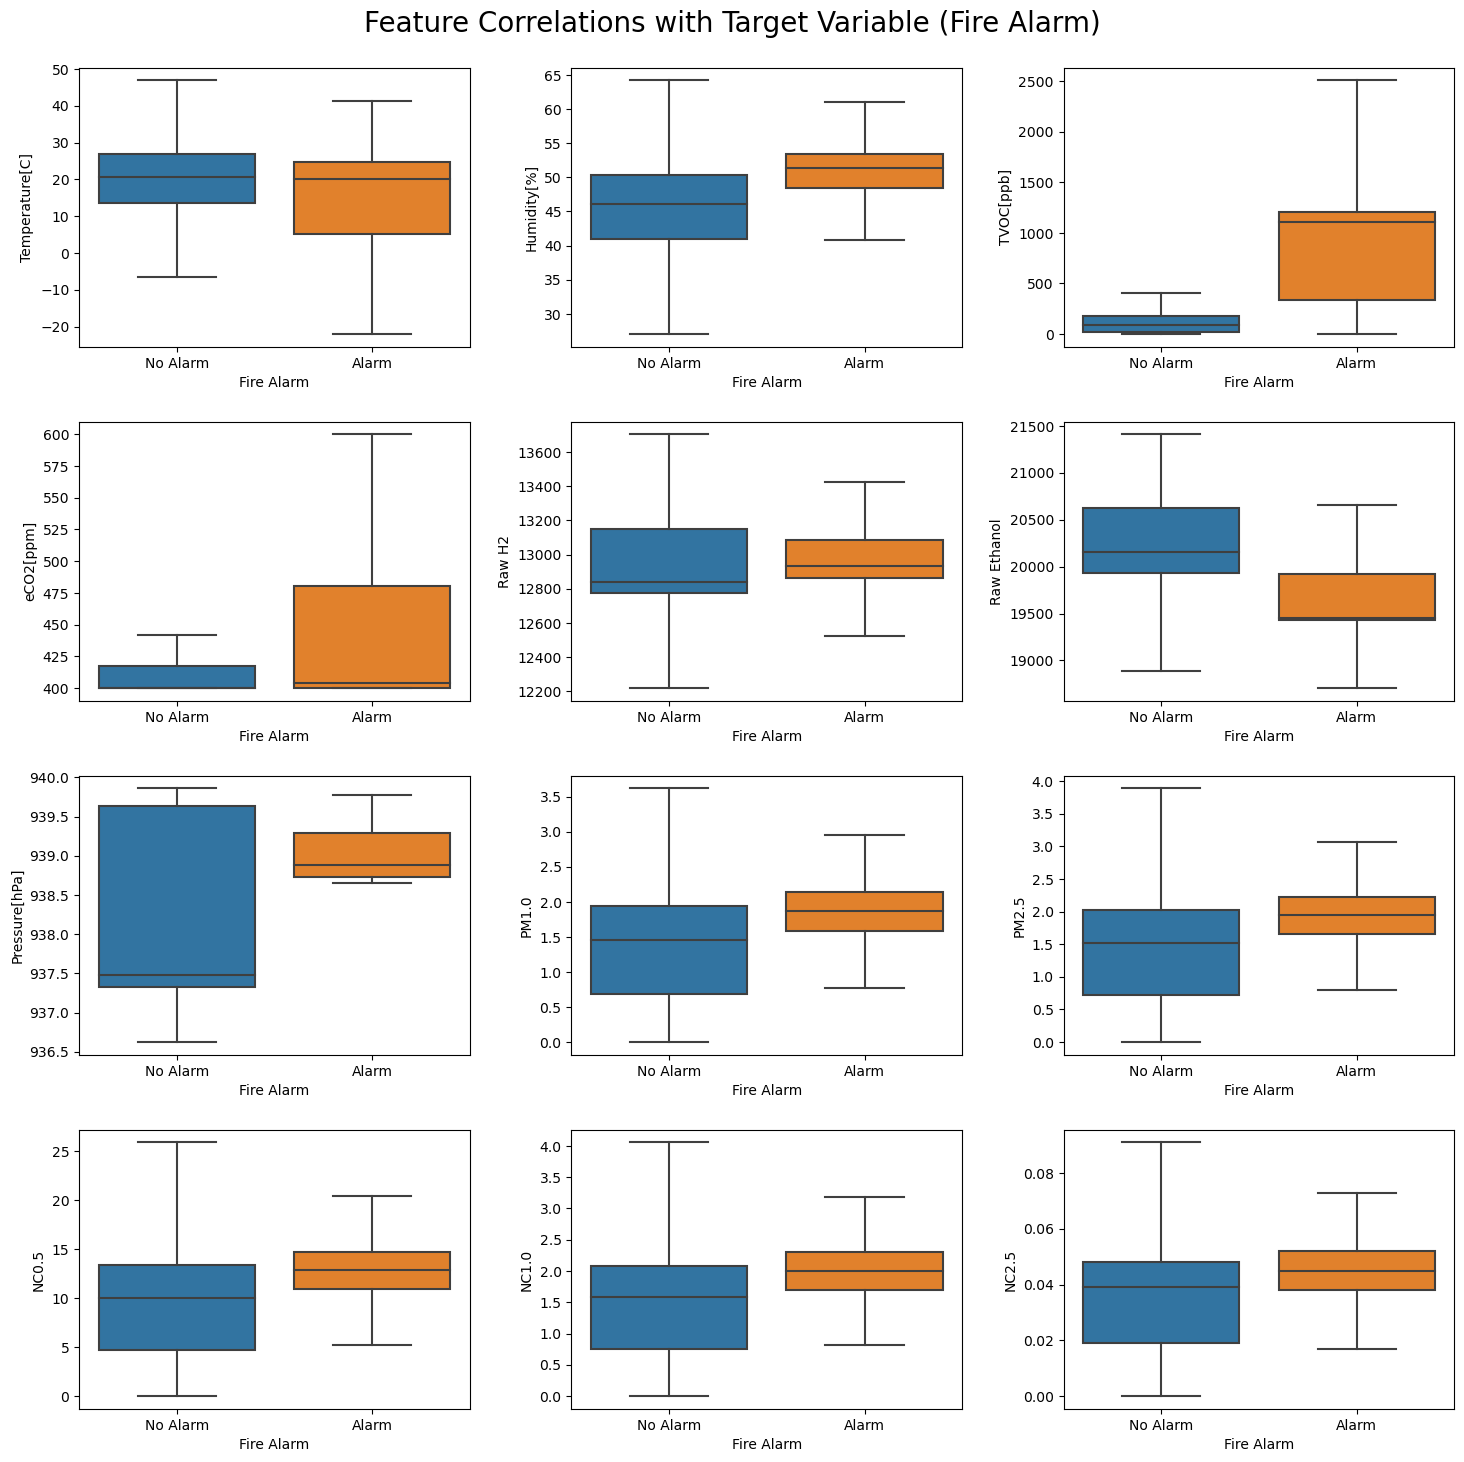

In [39]:
# Relation data attributes to Fire Alarm status
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 15))

for feature, subplot in zip(df, ax.flatten()):
    if feature == 'Fire Alarm':
        continue
    sns.boxplot(x = df['Fire Alarm'], y = df[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])

plt.suptitle('Feature Correlations with Target Variable (Fire Alarm)', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

## Correlation

In [8]:
# Correlation between features
corr = df.corr()
corr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


C:\Users\rizky\AppData\Local\Temp\ipykernel_12052\2069611589.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Temperature[C]'),
  Text(0, 1.5, 'Humidity[%]'),
  Text(0, 2.5, 'TVOC[ppb]'),
  Text(0, 3.5, 'eCO2[ppm]'),
  Text(0, 4.5, 'Raw H2'),
  Text(0, 5.5, 'Raw Ethanol'),
  Text(0, 6.5, 'Pressure[hPa]'),
  Text(0, 7.5, 'PM1.0'),
  Text(0, 8.5, 'PM2.5'),
  Text(0, 9.5, 'NC0.5'),
  Text(0, 10.5, 'NC1.0'),
  Text(0, 11.5, 'NC2.5'),
  Text(0, 12.5, 'Fire Alarm')])

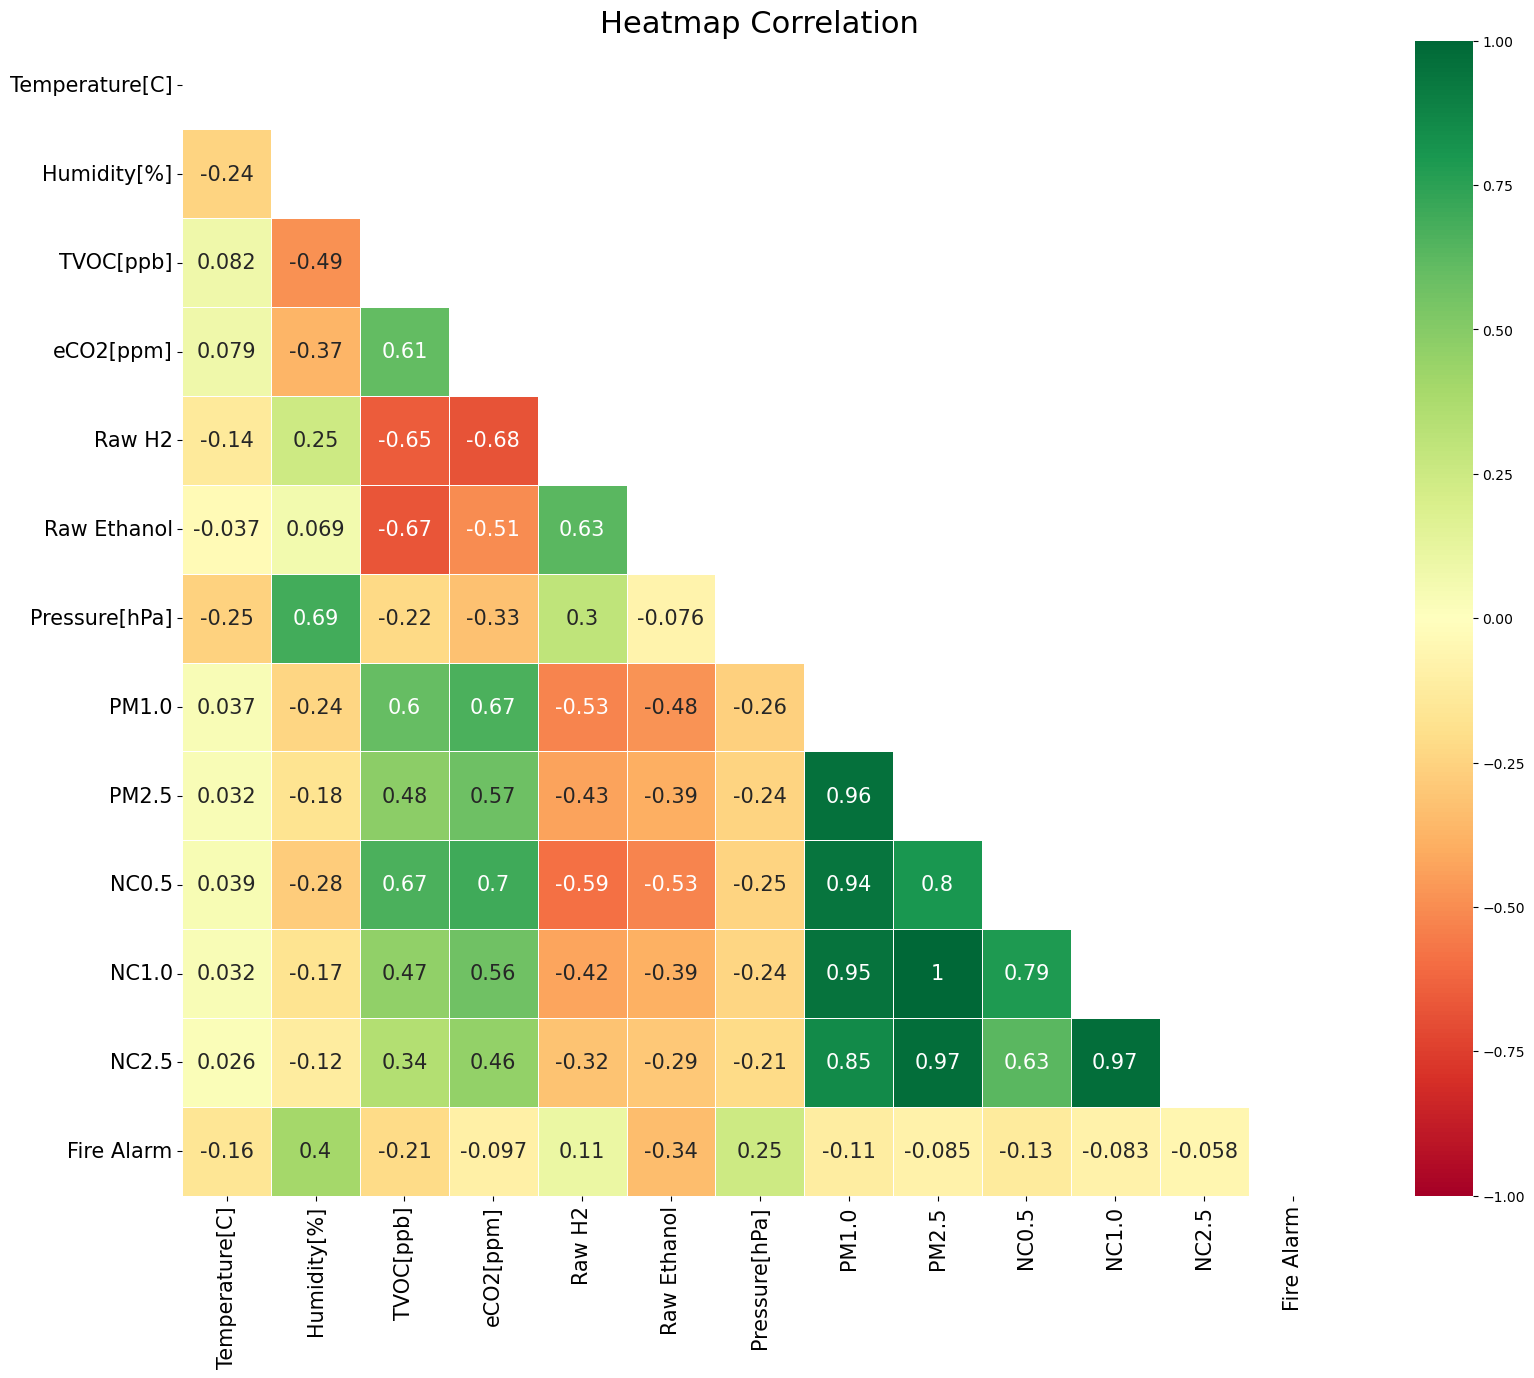

In [9]:
# Heatmap visualization correlation between features
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Insight:
- Positive: Humidity and Pressure are the highest positive correlation to Target Variable
- Negative: Temperature TVOC are the highest negative correlation to Target Varible

# Data Preprocessing

## Check Missing Value

In [10]:
df.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

## Check Duplicate Value

In [11]:
df[df.duplicated(keep=False)]

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
51335,26.90,45.15,22,415,12846,20760,937.582,2.04,2.12,14.05,2.190,0.049,0
51385,27.12,44.50,55,412,12832,20717,937.571,2.15,2.23,14.80,2.308,0.052,0
57079,26.90,45.15,22,415,12846,20760,937.582,2.04,2.12,14.05,2.190,0.049,0
57129,27.12,44.50,55,412,12832,20717,937.571,2.15,2.23,14.80,2.308,0.052,0


In [12]:
# Drop duplicate values
df = df.drop_duplicates()

## Feature Engineering

### Split data for modeliing

In [13]:
df_train = df.copy()
df_train.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [14]:
# Split Train and test data with ratio 0.2. That means 80% data for training and 20% data for validation process.
X = df_train.drop(columns=['Fire Alarm']).copy()
y = df_train['Fire Alarm'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
print(len(X_train))
print(len(X_test))

50102
12526


### SMOTE Imbalanced Data

<Axes: xlabel='Fire Alarm', ylabel='count'>

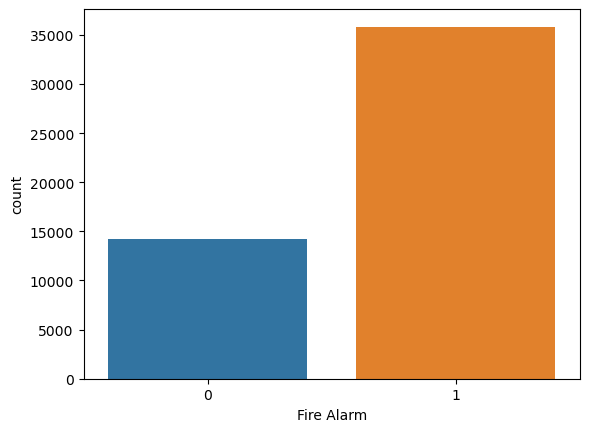

In [15]:
sns.countplot(x = y_train)

In [16]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

<Axes: xlabel='Fire Alarm', ylabel='count'>

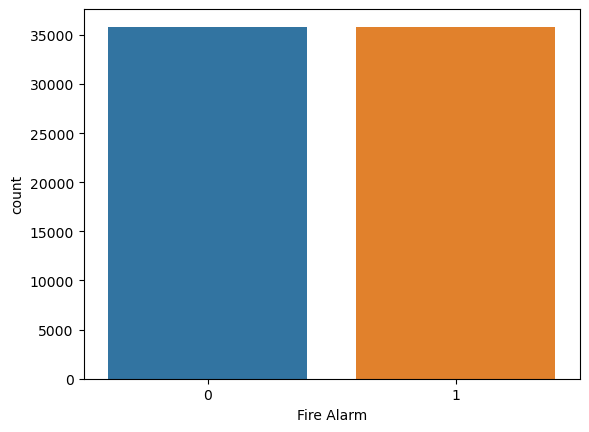

In [17]:
sns.countplot(x = y_smote)

### Standarization

In [18]:
X_smote.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,26.960,47.25,1046,548,12835,19474,938.972,1.89,1.96,13.01,2.028,0.046
1,46.680,28.29,60000,8971,11429,16726,936.876,2921.26,3035.09,20105.88,3135.273,70.814
2,26.570,45.53,174,446,12761,20544,937.358,1.67,1.73,11.48,1.790,0.040
3,24.578,56.35,0,400,12734,19764,939.843,0.13,0.17,0.84,0.185,0.036
4,19.430,46.20,189,400,13132,19990,939.654,0.94,0.97,6.45,1.005,0.023


In [19]:
scaler = StandardScaler()
scaler.fit(X_smote[:])
X_smote[:] = scaler.transform(X_smote[:])
X_test[:] = scaler.transform(X_test[:])

In [20]:
X_smote.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.689528,0.034810,-0.164245,-0.091694,-0.286318,-0.509537,0.375818,-0.132012,-0.114686,-0.137726,-0.113002,-0.090279
1,2.074251,-1.832699,5.588314,3.646432,-4.570912,-4.200859,-1.210853,2.524685,1.233881,3.658220,1.134006,-0.030902
2,0.662142,-0.134605,-0.249332,-0.136961,-0.511823,0.927768,-0.845979,-0.132213,-0.114788,-0.138015,-0.113097,-0.090284
3,0.522266,0.931136,-0.266310,-0.157376,-0.594102,-0.119987,1.035165,-0.133614,-0.115481,-0.140025,-0.113736,-0.090287
4,0.160777,-0.068612,-0.247868,-0.157376,0.618749,0.183594,0.892092,-0.132877,-0.115126,-0.138965,-0.113409,-0.090298


# Modelling

## Logistic Regression

In [21]:
log = LogisticRegression()
log.fit(X_smote, y_smote)
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3600
           1       0.96      0.90      0.93      8926

    accuracy                           0.91     12526
   macro avg       0.88      0.91      0.89     12526
weighted avg       0.91      0.91      0.91     12526



## KNN

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_smote, y_smote)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      1.00      1.00      8926

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



## Decision Tree

In [23]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_smote, y_smote)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      1.00      1.00      8926

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



## Random Forest

In [24]:
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      1.00      1.00      8926

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



# Model Evaluation

In [25]:
def eval(model_name):
  if model_name == 'Logistic Regression':
    model = log
  elif model_name == 'KNN':
    model = knn
  elif model_name == 'Decision Tree':
    model = tree
  else:
    model = rf
  y_pred = model.predict(X_test)         
  print(model_name)
  print('Accuracy score (training): {0:.3f}'.format(model.score(X_smote, y_smote)))
  print('Accuracy score (test): {0:.3f}'.format(model.score(X_test, y_test)))
  print('MSE: {0:.3f}'.format(mean_squared_error(y_test,y_pred)))
  print('MAE: {0:.3f}'.format(mean_absolute_error(y_test,y_pred)))
  print('RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
  print('')

## Evaluation each model

In [26]:
list_model = ['Logistic Regression','KNN','Decision Tree','Random Forest']

for model in list_model:
  eval(model)

Logistic Regression
Accuracy score (training): 0.908
Accuracy score (test): 0.906
MSE: 0.094
MAE: 0.094
RMSE: 0.306

KNN
Accuracy score (training): 0.999
Accuracy score (test): 0.999
MSE: 0.001
MAE: 0.001
RMSE: 0.028

Decision Tree
Accuracy score (training): 1.000
Accuracy score (test): 1.000
MSE: 0.000
MAE: 0.000
RMSE: 0.009

Random Forest
Accuracy score (training): 1.000
Accuracy score (test): 1.000
MSE: 0.000
MAE: 0.000
RMSE: 0.000



## Confusion Matrix - Logistic Regression

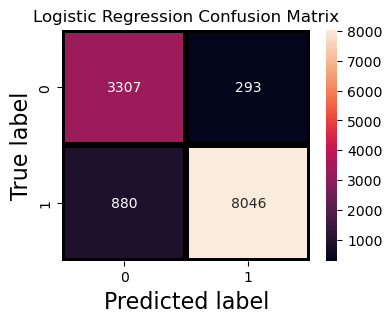

In [27]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_log),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.ylabel('True label',fontdict={'size':'16'})
plt.xlabel('Predicted label',fontdict={'size':'16'})
plt.show()

## Confusion Matrix - Random Forest

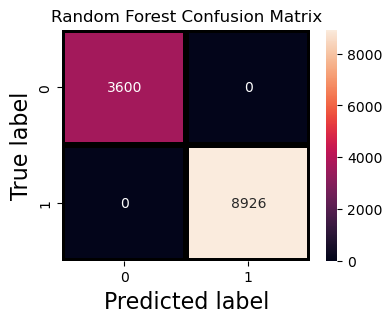

In [40]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest Confusion Matrix",fontsize=12)
plt.ylabel('True label',fontdict={'size':'16'})
plt.xlabel('Predicted label',fontdict={'size':'16'})
plt.show()

# Save Model and Testing Manually

## Save Model

In [29]:
# saving the model as pkl file
with open('model.pkl','wb') as file:
    pickle.dump(rf, file)

## Testing

In [30]:
trained_load_model = pickle.load(open("model.pkl", "rb"))
trained_load_model

RandomForestClassifier()

In [31]:
data = {
    'Temperature[C]':[20.960],
    'Humidity[%]':[57.25],
    'TVOC[ppb]':[100],
    'eCO2[ppm]':[548],
    'Raw H2':[12835],
    'Raw Ethanol':[19474],
    'Pressure[hPa]':[238.972],
    'PM1.0':[1.89],
    'PM2.5':[1.96],
    'NC0.5':[13.01],
    'NC1.0':[2.028],
    'NC2.5':[0.046]
}
data = pd.DataFrame(data)
data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.96,57.25,100,548,12835,19474,238.972,1.89,1.96,13.01,2.028,0.046


In [32]:
data = pd.DataFrame(scaler.transform(data),columns = data.columns)
data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.268213,1.019784,-0.256552,-0.091694,-0.286318,-0.509537,-529.523792,-0.132012,-0.114686,-0.137726,-0.113002,-0.090279


In [33]:
predict = trained_load_model.predict(data)[0]
if predict == 1:
    print('Alarm')
else:
    print('No Alarm')

No Alarm
